In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from io import StringIO

For CSV File

In [ ]:
df = pd.read_csv('Heap_Log.csv', delimiter=';', parse_dates=['Timestamp'])
df['Time'] = df['Timestamp'].dt.strftime('%H:%M')
print(df.head(100))

             Timestamp    Batttery  FREE_HEAP  MIN_FREE_HEAP   Time
0  2025-03-20 09:48:55  467.975008  81.716000      79.443000  09:48
1  2025-03-20 10:18:55   23.810001  83.801333      73.900000  10:18
2  2025-03-20 10:48:55   23.780001  84.236000      73.900000  10:48
3  2025-03-20 11:18:55   23.773334  84.236000      73.900000  11:18
4  2025-03-20 11:48:55   23.676667  83.746667      73.900000  11:48
..                 ...         ...        ...            ...    ...
95 2025-03-22 09:18:55   27.253333  81.450667      74.690667  09:18
96 2025-03-22 09:48:55   27.236666  81.296000      74.512000  09:48
97 2025-03-22 10:18:55   27.413334  81.150667      74.361333  10:18
98 2025-03-22 10:48:55   27.376667  80.456000      74.137333  10:48
99 2025-03-22 11:18:55   27.423333  80.318667      73.956000  11:18

[100 rows x 5 columns]


In [115]:
# Filter for March 22 and time from 11:00 onwards
df_filtered = df[(df['Timestamp'].dt.strftime('%m-%d') == '03-22') & (df['Time'] >= '12:00')]

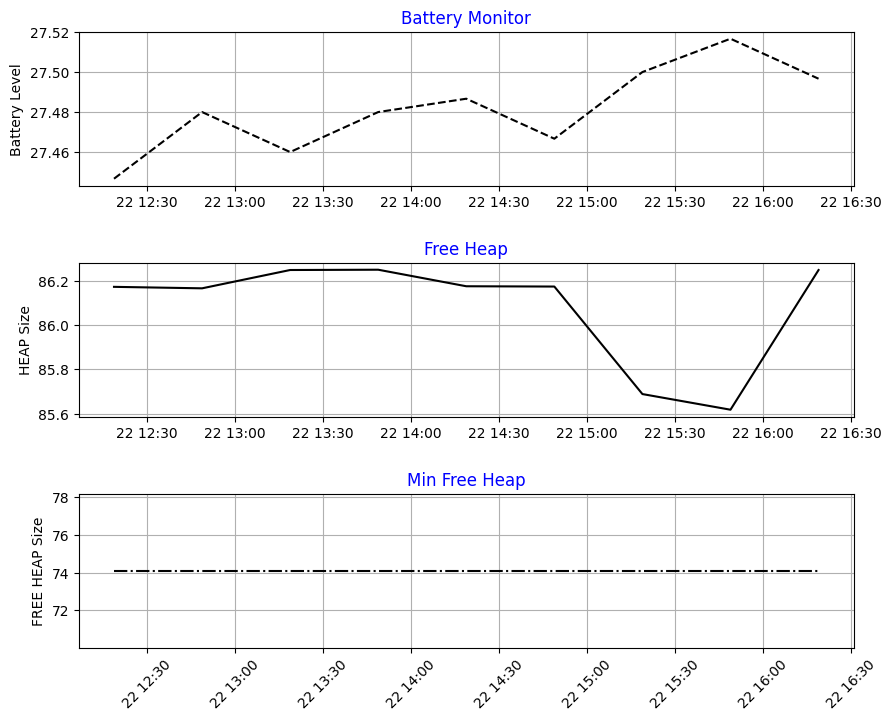

In [ ]:
# Create subplots for each parameter
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
# Adjust layout spacing
plt.subplots_adjust(hspace=0.5)

axes[0].plot(df_filtered['Timestamp'], df_filtered['Batttery'], linestyle='--', color='black')
axes[0].set_title('Battery Monitor',color='blue')
axes[0].set_ylabel('Battery Level')
axes[0].grid(True)

axes[1].plot(df_filtered['Timestamp'], df_filtered['FREE_HEAP'], linestyle='-', color='black')
axes[1].set_title('Free Heap',color='blue')
axes[1].set_ylabel('HEAP Size')
axes[1].grid(True)

axes[2].plot(df_filtered['Timestamp'], df_filtered['MIN_FREE_HEAP'], linestyle='-.', color='black')
axes[2].set_title('Min Free Heap', color='blue')
axes[2].set_ylabel('FREE HEAP Size')
axes[2].grid(True)

plt.xticks(rotation=45)
plt.show()


For XLSX File